1. [Numpy](#Numpy)

    - [생성](#생성)


# <span style="color:blue">numpy</span>

In [8]:
!pip install --upgrade --user numpy

  Using cached numpy-1.19.1-cp36-cp36m-win_amd64.whl (12.9 MB)


ERROR: tensorflow-gpu 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.0.2 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np
np.__version__

'1.19.1'

## <span style="color:blue">생성</span>

In [3]:
a = np.array([1,'1']) # 문자로 casting  init아니라 class가 아님
# homogenius : 
# copy : 
# order : 메모리가 연속적, 컬럼으로 저장할지 row로 저장할지
print(a) # list가 아님, type은 ndarray(instance화해서 만듬)

['1' '1']


In [4]:
b = np.ndarray([1,2,]) # init -> class임
b

array([[6.52891868e-238, 2.36195119e+289]])

In [16]:
aa = np.array([[1,2],[3,4]]) # 직사각형 형태가 아니면 list형태로 변환
aa

array([[1, 2],
       [3, 4]])

In [6]:
aa = np.array([[[1,2],[3,4]], [[1,2],[3,4]]])  # 3차원 (차원이 나뉠때 공백으로 나옴)
aa

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]]])

In [6]:
print(aa.shape)
print(aa.dtype)

(2, 2, 2)
int32


In [7]:
import tensorflow as tf
b = tf.constant([1,2,3])
b.numpy()

array([1, 2, 3])

In [11]:
b = np.full((2,3),2)
b
# np.ones, np.zeros

array([[2, 2, 2],
       [2, 2, 2]])

In [12]:
c = np.ones_like(b) # shape을 같이 만들어줌
c

array([[1, 1, 1],
       [1, 1, 1]])

In [14]:
d = np.eye(3, k=1) # 단위행렬 + 옮기기
d   #eye
# np.identity : 옮기기 안됨

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [21]:
e = np.tri(3)
print(e)
np.diag(e) # 대각원소만 뽑음

[[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]


array([1., 1., 1.])

In [23]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
np.linspace(0,10,num=5,endpoint=False)

array([0., 2., 4., 6., 8.])

## 사용

- __ len __ 이 있으면 sequence라 할 수 있음
- indexing과 slicing지원

In [26]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [27]:
a[0][1]  # 바깥부터 확인해서 indexing  
# a[0,1]

1

In [28]:
b = np.arange(24).reshape(2,3,4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [29]:
b[1,2,2]

22

In [30]:
b[1,...]  # 한개이상의 : 은 ...으로 바꿀 수 있고 생략도 가능
#b[1]

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [31]:
b[...,0] # b[:,:,0]

array([[ 0,  4,  8],
       [12, 16, 20]])

In [32]:
...  # 연산자 오버로딩 개념 (연산자 기능을 바꿈)

Ellipsis

In [37]:
class B(int):
    def __add__(self,other):
        print('add')
#     pass

In [34]:
x= B(3)

In [38]:
x+x

add


In [41]:
c = np.arange(25).reshape(5,5)
c[None,:] # 3차원이 됨(차원 추가 개념)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]])

In [44]:
print(c[None].shape)
print(c[:,None].shape)
print(c[...,None].shape)

(1, 5, 5)
(5, 1, 5)
(5, 5, 1)


In [46]:
np.newaxis is None# Nonetype(out이 없다)

True

In [47]:
c > 10

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [49]:
# Element wise : 벡터 연산 같은거(같은 자리에 있는 것끼리 처리)
x = np.array([1,2,3])
y = np.array([4,5,6])
x+y
# 독립적인 연산이라 속도가 빠름

array([5, 7, 9])

In [50]:
c[(c>10)|(c<5)]

array([ 0,  1,  2,  3,  4, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24])

In [ ]:
# boolean indexing
# mask array

In [51]:
x = np.ma.masked_array([1,2,],[True,False])  # missing data 처리할 때
x

masked_array(data=[--, 2],
             mask=[ True, False],
       fill_value=999999)

In [86]:
d = np.mat

TypeError: Field elements must be 2- or 3-tuples, got '3'

In [53]:
d = np.mat([[1,2],[3,4]])
d*d

matrix([[ 7, 10],
        [15, 22]])

In [54]:
e = np.array([[1,2],[3,4]])
e*e

array([[ 1,  4],
       [ 9, 16]])

In [56]:
# @ : 행렬곱해줌
e@e

array([[ 7, 10],
       [15, 22]])

In [ ]:
# np.multiply : 그냥곱
# np.dot : 행렬곱

In [57]:
d.dot(d) # method방식

# function의 범위가 더 넓음. method방식에 있는거는 대부분 function에 있지만 역은 아님

matrix([[ 7, 10],
        [15, 22]])

In [62]:
from PIL import Image
x = Image.open('2.jpg')

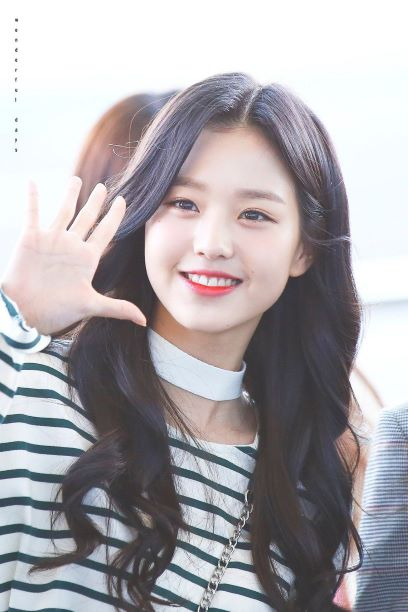

In [63]:
x

In [64]:
dir(x)

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_expand',
 '_getexif',
 '_getmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'encoderconfig',
 'encoderinfo',
 'entropy',
 'filename',
 'filter',
 'format',
 'format_d

### <span style="color:blue">fancy indexing</span>

In [65]:
a = np.arange(25).reshape(5,5)
a[[0,1]]  # 괄호 두개일때 차원 유지

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [67]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
tips[['day','sex']].head()

,day,sex
0,Sun,Female
1,Sun,Male
2,Sun,Male
3,Sun,Male
4,Sun,Female


In [71]:
a[[2,0]] # 순서바꾸기 가능

array([[10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4]])

In [77]:
a[[2,0],[2,3]]

array([12,  3])

### <span style="color:blue">copy</span>

- 인자를 전달하면 같이 바뀌는 경우가 많아 copy사용해야함
- 원본 백업 용도

In [79]:
a=b=[1,2,3]
a[0]=100
b

[100, 2, 3]

In [80]:
# numpy는  mutable에 가깝다고 할 수 있다.
x=np.array([1,2,3])
y=x
y[0] = 100
x

array([100,   2,   3])

In [81]:
a=[1,2,3]
b = a.copy()  # a[:]로도 쓸 수 있다.
a[0]=100
b

[1, 2, 3]

In [82]:
a = [[1,2],[3,4]]
b=a.copy()  # 겹으로 쌓여지면 안됨
a[0][0]=100
b

[[100, 2], [3, 4]]

In [83]:
import copy
a = [[1,2],[3,4]]
b=copy.deepcopy(a)  # 겹으로 쌓여지면 안됨
a[0][0]=100
b

[[1, 2], [3, 4]]

In [84]:
x = np.array([[1,2],[3,4]])
y = x.copy()
y[0,0] = 100
x #그냥 copy만 써도 됨

#deepcopy -> copy
#copy -> view

array([[1, 2],
       [3, 4]])

# <span style="color:blue">갑분데싸</span>

- 